<a href="https://colab.research.google.com/github/Alishaw99/Revisting-Gemini/blob/main/Document_and_Image_Understanding_Capability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Install the Google Generative AI SDK
!pip install -q google-generativeai

In [11]:
import os
os.environ["GOOGLE_API_KEY"] = ""


# DOCUMENT UNDERSTANDING


In [5]:
from google import genai
from google.genai import types
import httpx

client = genai.Client()

# document URL
doc_url = "https://www.ril.com/sites/default/files/2025-08/RIL-Integrated-Annual-Report-2024-25.pdf"

doc_data = httpx.get(doc_url).content

prompt="IN page number 5  there is an table  and content written on the right side of the table,is the content  and table related to each other."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=doc_data,
            mime_type="application/pdf"
        ), prompt
    ])

In [6]:
print(response.text)

Yes, the content written on the right side of the page, specifically the "MANAGEMENT DISCUSSION AND ANALYSIS" section which includes "Financial Performance and Review," is directly related to the "10-YEAR FINANCIAL HIGHLIGHTS" table.

The financial highlights table presents key numerical data (like Revenue, EBITDA, Net Profit, etc.) over a decade. The "Financial Performance and Review" section provides a qualitative analysis and explanation of these figures, discussing the operating environment, performance overview, consolidated net debt, and capital expenditure. It gives context and insights into the numbers presented in the table.


In [7]:
from google import genai
from google.genai import types
import pathlib

client = genai.Client()

filepath= pathlib.Path("/content/sample_data/resume_tech.pdf")

prompt="Summarize this document"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=filepath.read_bytes(),
            mime_type="application/pdf"
        ), prompt
    ])

print(response.text)

Syed Ali is a highly experienced **Data-Driven Social Scientist and Analytics Leader** with over **20 years** in research, monitoring & evaluation (MEL), and enterprise-wide data strategy. He specializes in designing and implementing scalable data infrastructure, advanced analytics, and reporting frameworks to drive evidence-based decision-making across nonprofit, public sector, and technology environments.

**Key highlights from his profile include:**

*   **Extensive Experience:** Proven track record in data integration, governance, predictive modeling, and leading cross-functional teams to operationalize data culture.
*   **Technical Proficiency:** Blends quantitative and qualitative methodologies with AI and machine learning applications. Proficient in Python, R, SQL, Tableau, Power BI, Scikit-Learn, TensorFlow, AWS (EC2, S3, RDS), Hadoop, Spark, and Hive.
*   **Impactful Leadership:** Adept at building teams, fostering data-driven cultures, and aligning analytics strategy with bus

In [8]:
response

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            text="""Syed Ali is a highly experienced **Data-Driven Social Scientist and Analytics Leader** with over **20 years** in research, monitoring & evaluation (MEL), and enterprise-wide data strategy. He specializes in designing and implementing scalable data infrastructure, advanced analytics, and reporting frameworks to drive evidence-based decision-making across nonprofit, public sector, and technology environments.

**Key highlights from his profile include:**

*   **Extensive Experience:** Proven track record in data integration, governance, predictive modeling, and leading cross-functional teams to operationalize data culture.
*   **Technical Proficiency:** Blends quantitative and qualitative methodologies with AI and machine learning applications. Proficient in Python, R, SQL, Tableau, Power BI, Scikit-Learn, TensorFlow, A

In [9]:
prompt = """
From the early-stage diagnosis percentages for different cancer types, identify the type with the lowest early-stage detection rate.
Then, using the literature review, explain at least two environmental or behavioral factors that could contribute to this lower detection.
"""

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=filepath.read_bytes(),
            mime_type="application/pdf"
        ), prompt
    ])

print(response.text)

Based on the provided documents (resume and cover letter), there is **no specific information or data provided regarding early-stage diagnosis percentages for different cancer types.** Therefore, I cannot identify the cancer type with the lowest early-stage detection rate from the given text.

However, drawing upon the professional summary and cover letter, which function as a "literature review" of Syed Ali's expertise and understanding of health outcomes, two environmental or behavioral factors that could contribute to lower detection rates for any health issue, including cancer, can be identified:

1.  **Socioeconomic Status and Access Barriers:**
    *   The cover letter states, "I lead evaluation and analytics for federally and state-funded workforce programs serving vulnerable populations, including individuals transitioning from homelessness. I design data pipelines and causal models that connect non-clinical factors such as confidence, social support, and **access barriers** to

In [10]:
from google import genai
from google.genai import types
import pathlib

client = genai.Client()

# File paths for both strategies
strategy1_path = pathlib.Path('/content/sample_data/3743194-Week6Assignment (1).pdf')
strategy2_path = pathlib.Path('/content/sample_data/3743194-Week6Assignment (2).pdf')

#prompt = "Tell me the difference between both the strategies"
prompt = "Tell me the similarity between both the strategies"

# Generate content with both PDFs passed as separate inputs
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[
        types.Part.from_bytes(
            data=strategy1_path.read_bytes(),
            mime_type='application/pdf'
        ),
        types.Part.from_bytes(
            data=strategy2_path.read_bytes(),
            mime_type='application/pdf'
        ),
        prompt
    ]
)

print(response.text)

Based on the two OCR outputs you've provided for the *same document*, the similarity between "both strategies" (or runs) is **100%**.

Both sets of OCR results are **identical in every single character, word, line, and page**.

This implies:
1.  **Perfect Accuracy:** Both OCR processes (whether they were truly different strategies or just two runs of the same one) accurately transcribed the entire text without any errors, omissions, or misinterpretations.
2.  **No Detectable Difference:** There is no textual difference between the first and second OCR outputs. They produced the exact same content.

Given the clarity and standard formatting of the source document, it's highly probable that any competent OCR engine would produce a perfect or near-perfect result. Therefore, while you've presented "two strategies," they yielded indistinguishable outcomes in this instance.


# IMAGE UNDERSTANDING


In [ ]:
# Gemini models are built to be multimodal from the ground up, unlocking a wide range of image processing and computer vision tasks,
# without having to train specialized ML models.


# Think of it like giving the AI eyes — it can look at a picture and:
#       Describe it in words (image captioning)
#       Answer questions about it (visual Q&A)
#       Find & locate objects, image labelling.
#       Read text in images (OCR)
#       Compare images (find differences, similarities)
#       Extract data (like reading numbers, charts, forms)

In [ ]:
#  Describe it in words
from google import genai
from google.genai import types
from PIL import Image


client = genai.Client()


image = Image.open("/content/cat_dog_image.png")

prompt ="Give me an caption for the image"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

Here are a few caption options for the image, ranging from simple to more descriptive:

**Short & Sweet:**
*   Pet pals.
*   A friendly duo.
*   Cute companions.
*   Cat and dog.
*   Best friends forever.

**Descriptive:**
*   An adorable cartoon illustration of an orange tabby cat and a light brown dog sitting side-by-side.
*   Two happy pets, a cat and a dog, captured in a charming, simple style.
*   A heartwarming image of a contented cat and dog looking out.

**Whimsical/Playful:**
*   Double the cuteness!
*   Just two buddies hanging out.
*   Who could resist these happy faces?

**Social Media Ready:**
*   Purr-fectly pawsome friends! 🐾❤️ #CatAndDog #PetPals #CuteAnimals
*   Happiness is a cat and dog side-by-side. 😊 #AnimalFriends #AdorabPets
*   The ultimate duo! What's your favorite pet combo? 👇 #PetsOfInstagram #CutePets

Choose the one that best fits the context where you'll be using it!


In [ ]:
#   Answer questions about it (visual Q&A)
client = genai.Client()


image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="Which color is dog's collar"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image2, prompt]
    )

print(response.text)

Based on the images provided, the dog does not appear to be wearing a collar.


In [ ]:
#  Read text in images (OCR)
client = genai.Client()


image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="Read all the text written in the image."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

I have carefully examined the original image and all the provided crops. There is **no text written** in any of the images. They depict cartoon illustrations of a cat and a dog.


In [ ]:
#       Compare images (find differences, similarities)

image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="What is the difference between both the images."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, image2, prompt]
    )

print(response.text)

The primary differences between the two images are in their **artistic style** and **level of realism**.

1.  **Artistic Style/Realism:**
    *   **Image 1:** Depicts a cat and a dog in a **cartoonish, simplified, and illustrative style**. They have clear outlines, flat colors, and stylized, friendly expressions. It's not meant to be realistic.
    *   **Image 2:** Shows a cat and a dog in a **highly realistic, photographic style**. They are detailed, with visible fur texture, realistic eyes, and natural, unsmiling expressions, resembling a real photo.

2.  **Level of Detail:**
    *   **Image 1:** Lacks intricate details, focusing on basic shapes and features.
    *   **Image 2:** Rich in detail, showcasing individual hairs, whiskers, and realistic textures.

3.  **Text:**
    *   **Image 1:** Contains no text.
    *   **Image 2:** Includes the text "CAT AND DOG" prominently displayed at the top.

4.  **Composition/Framing:**
    *   **Image 1:** Shows the full bodies of both animals 

In [ ]:
#       Find & locate objects, image labelling.

In [ ]:
#  Read text in images (OCR)
client = genai.Client()
image2=  Image.open("/content/cat_dog.png")
W,H= image2.size
prompt ="""Find all  main objects  in the image,
           For each object , return JSON:
           {"label":".....","box_2d":[ymin, xmin, ymax, xmax]}scaled to 0-1000
     """

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image2, prompt],
    config={"response_mime_type":"application/json"}
    )

print(response.text)

[
  {"label": "CAT", "box_2d": [238, 0, 1000, 477]},
  {"label": "DOG", "box_2d": [234, 437, 1000, 1000]},
  {"label": "CAT AND DOG", "box_2d": [46, 120, 195, 903]}
]


In [ ]:
import json
from IPython.display  import display

object = json.loads(response.text)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
draw= ImageDraw.Draw(image2) # add canvas
font= ImageFont.load_default() # add labels

In [ ]:
object

[{'label': 'CAT', 'box_2d': [238, 0, 1000, 477]},
 {'label': 'DOG', 'box_2d': [234, 437, 1000, 1000]},
 {'label': 'CAT AND DOG', 'box_2d': [46, 120, 195, 903]}]

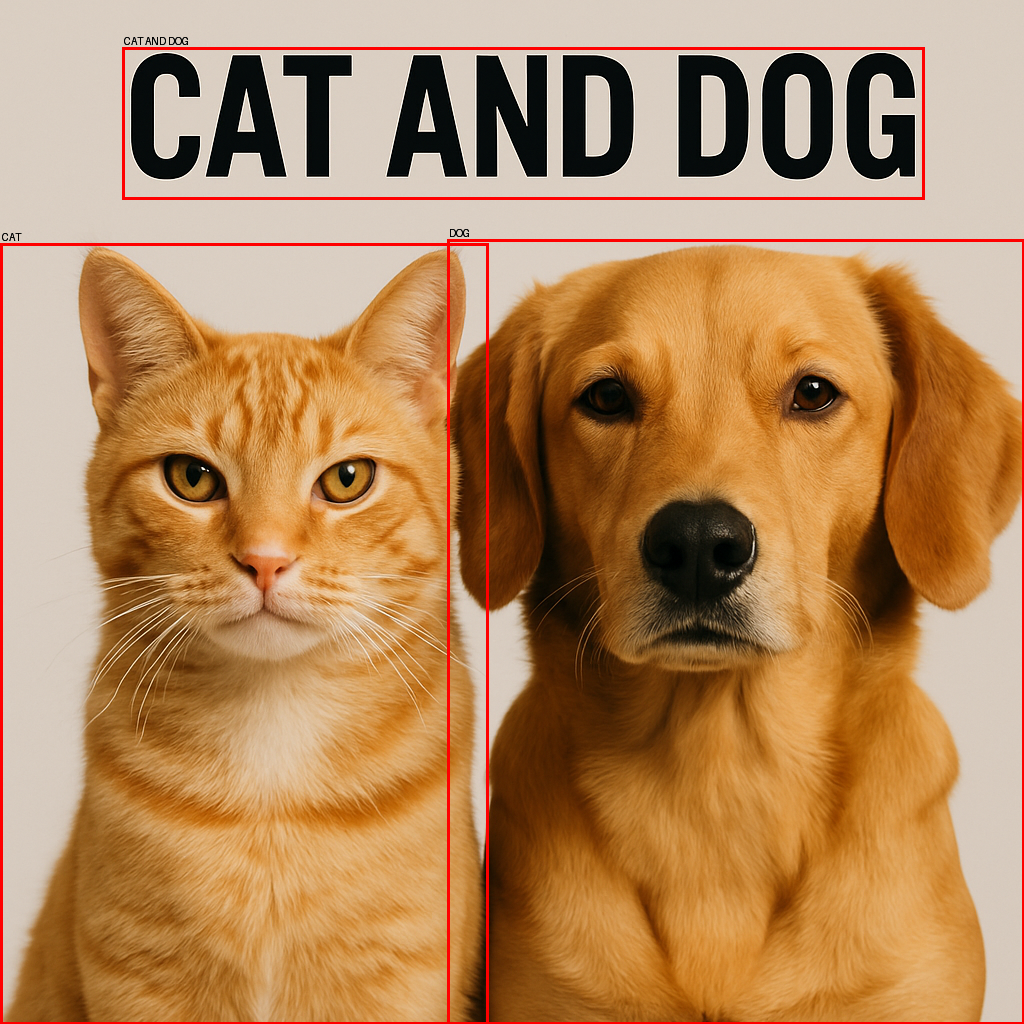

In [ ]:
for obj in object:
  label= obj["label"]
  ymin, xmin, ymax, xmax = obj["box_2d"]

  x1, y1 = int(xmin / 1000 * W), int(ymin / 1000 * H)
  x2, y2 = int(xmax / 1000 * W), int(ymax / 1000 * H)

  # draw rectangle
  draw.rectangle([x1,y1,x2,y2], outline="Red", width=3)


  #label
  draw.text((x1 + 2, y1 - th - 2), label, fill="black", font=font)



display(image2)